## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版

unique_house_type = app_train['HOUSETYPE_MODE']
unique_house_type.value_counts()



block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

In [4]:
unique_house_type.count()

153214

In [5]:
app_train["HOUSETYPE_MODE"].isna().sum()

154297

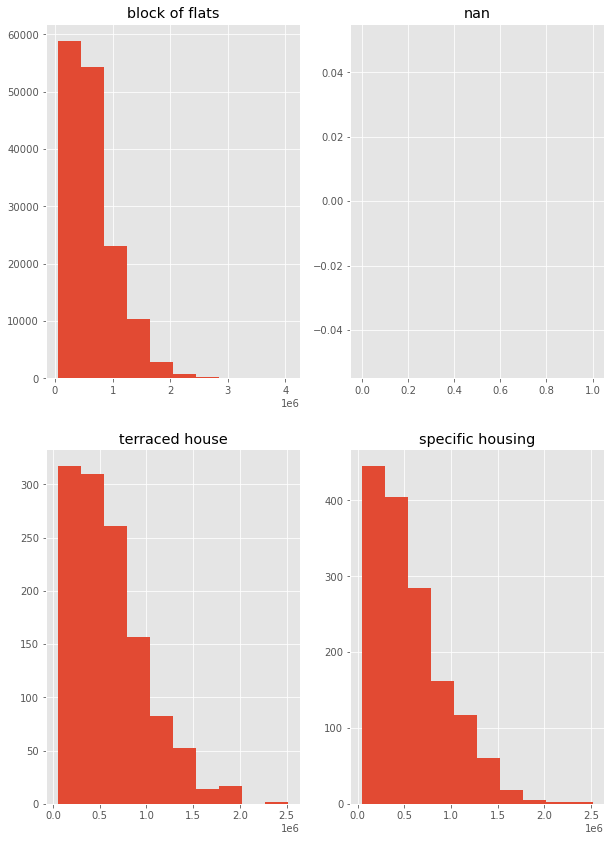

In [10]:
unique_house_type = app_train["HOUSETYPE_MODE"].unique()
    
nrows = len(unique_house_type)
ncols = nrows // 2

plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    app_train.loc[app_train["HOUSETYPE_MODE"]==unique_house_type[i],"AMT_CREDIT"].hist()
    plt.title(str(unique_house_type[i]))
    
plt.show()    

No handles with labels found to put in legend.


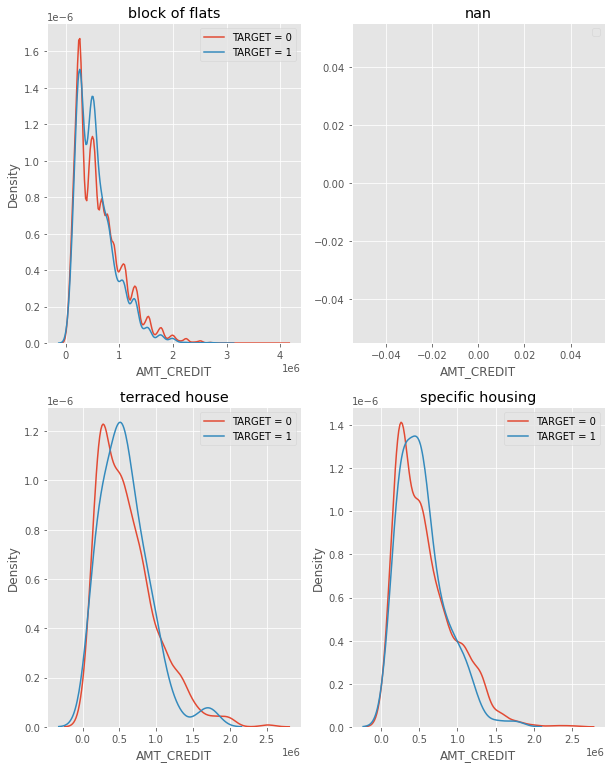

In [14]:


plt.figure(figsize=(10,20))
for i in range(len(unique_house_type)):
    plt.subplot(nrows1, ncols, i+1)
    sns.distplot(app_train.loc[(app_train['HOUSETYPE_MODE'] == unique_house_type[i]) & (app_train['TARGET'] == 0), 'AMT_CREDIT'], label = "TARGET = 0", hist = False)
    sns.distplot(app_train.loc[(app_train['HOUSETYPE_MODE'] == unique_house_type[i]) & (app_train['TARGET'] == 1), 'AMT_CREDIT'], label = "TARGET = 1", hist = False)
    plt.title(str(unique_house_type[i]))
    plt.legend()
plt.show()

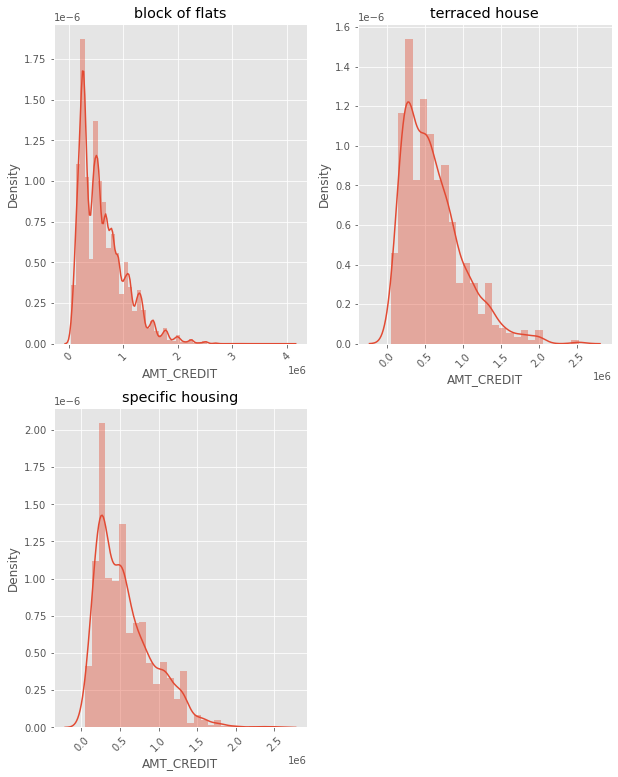

In [15]:
data_without_nan = app_train["HOUSETYPE_MODE"].dropna().unique()
nrows = 3
ncolumns = 1

plt.figure(figsize=(10,20))
for j in range(len(data_without_nan)):
    plt.subplot(nrows, ncols, j+1)
    sns.distplot(app_train.loc[app_train['HOUSETYPE_MODE'] == data_without_nan[j], "AMT_CREDIT"])
    plt.xticks(rotation=45)
    plt.title(str(data_without_nan[j]))
plt.show()

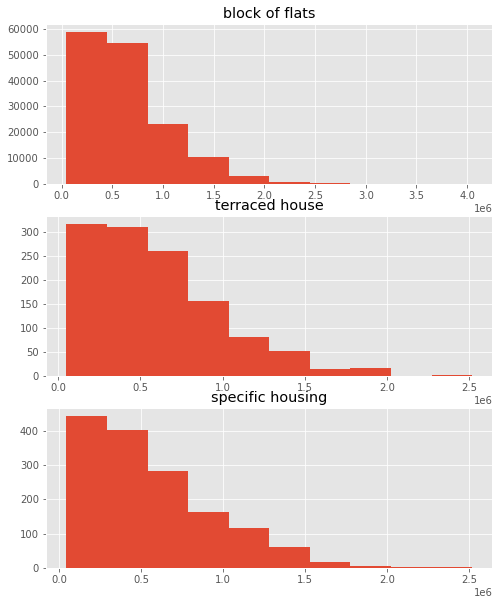

In [16]:
app_train2 = app_train[~app_train["HOUSETYPE_MODE"].isnull()]
unique_house_type2 = app_train2["HOUSETYPE_MODE"].unique()

nrows = len(unique_house_type2)
ncols = nrows // 2

plt.figure(figsize=(8,10))
for i in range(len(unique_house_type2)):
    plt.subplot(nrows, ncols, i+1)

    app_train2.loc[app_train2["HOUSETYPE_MODE"] == unique_house_type2[i], "AMT_CREDIT"].hist()
    
    plt.title(str(unique_house_type2[i]))
plt.show()